In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1-Load and Explore the Data  We begin by loading the datasets provided by the competition:  (`train.csv`, `features.csv`, `stores.csv` ) We also explore them briefly.
# 

In [10]:
import pandas as pd

base_path = "/kaggle/input/walmart-store-sales-forecasting/walmart-recruiting-store-sales-forecasting"

train_df = pd.read_csv(f"{base_path}/train.csv/train.csv")
features_df = pd.read_csv(f"{base_path}/features.csv/features.csv")
stores_df = pd.read_csv(f"{base_path}/stores.csv")
test_df = pd.read_csv(f"{base_path}/test.csv/test.csv")


In [11]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [13]:
train_df.shape

(421570, 5)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [16]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [17]:
train_df.isnull()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
421565,False,False,False,False,False
421566,False,False,False,False,False
421567,False,False,False,False,False
421568,False,False,False,False,False


In [18]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [19]:
features_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [21]:
features_df.shape

(8190, 12)

In [13]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [22]:
features_df.isnull()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [16]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [23]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [18]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [19]:
stores_df.shape

(45, 3)

In [20]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [21]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [22]:
stores_df.isnull()

,Store,Type,Size
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [23]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64


# 2-Merge and Clean the Data  We merge the three datasets using common keys: `Store`, `Date`, and `IsHoliday`
# 

In [24]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
features_df['Date'] = pd.to_datetime(features_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])


In [25]:
merged_df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_df = pd.merge(merged_df, stores_df, on='Store', how='left')
merged_df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


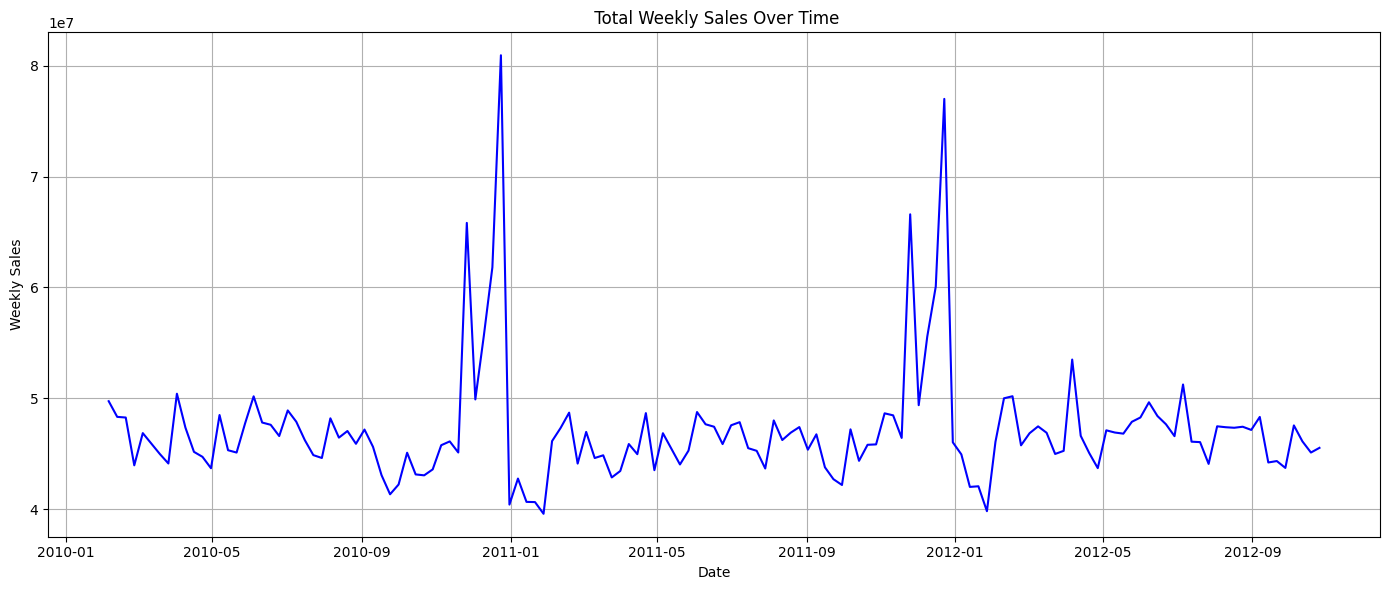

In [26]:
import matplotlib.pyplot as plt
sales_over_time = merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Weekly_Sales'], color='blue')
plt.title(" Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()



# 3-Time-based Feature Engineering  We extract time features such as year, month, and week number from the date


In [30]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['week'] = merged_df['Date'].dt.isocalendar().week
merged_df['day'] = merged_df['Date'].dt.day
merged_df['day_of_week'] = merged_df['Date'].dt.weekday

merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

merged_df[['Date', 'year', 'month', 'week', 'day', 'day_of_week', 'is_weekend']].head()


,Date,year,month,week,day,day_of_week,is_weekend
0,2010-02-05,2010,2,5,5,4,0
1,2010-02-12,2010,2,6,12,4,0
2,2010-02-19,2010,2,7,19,4,0
3,2010-02-26,2010,2,8,26,4,0
4,2010-03-05,2010,3,9,5,4,0



# 4-Lag Feature Engineering  We add previous weekly sales values as lag features: lag_1, lag_2, lag_3


In [31]:
merged_df = merged_df.sort_values(by=['Store', 'Dept', 'Date'])
merged_df['lag_1'] = merged_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
merged_df['lag_2'] = merged_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)
merged_df['lag_3'] = merged_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(3)
merged_df[['Store', 'Dept', 'Date', 'Weekly_Sales', 'lag_1', 'lag_2', 'lag_3']].head(10)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Dept,Date,Weekly_Sales,lag_1,lag_2,lag_3
0,1,1,2010-02-05,24924.50,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,24924.50,NaN,NaN
2,1,1,2010-02-19,41595.55,46039.49,24924.50,NaN
3,1,1,2010-02-26,19403.54,41595.55,46039.49,24924.50
4,1,1,2010-03-05,21827.90,19403.54,41595.55,46039.49
5,1,1,2010-03-12,21043.39,21827.90,19403.54,41595.55
6,1,1,2010-03-19,22136.64,21043.39,21827.90,19403.54
7,1,1,2010-03-26,26229.21,22136.64,21043.39,21827.90
8,1,1,2010-04-02,57258.43,26229.21,22136.64,21043.39
9,1,1,2010-04-09,42960.91,57258.43,26229.21,22136.64


In [32]:
model_df = merged_df.dropna(subset=['lag_1', 'lag_2', 'lag_3'])



**Define Target and Features  We define `Weekly_Sales` as the target variable, and select the feature columns used for training**


In [33]:
y = model_df['Weekly_Sales']

features = ['Store', 'Dept', 'month', 'week', 'lag_1', 'lag_2', 'lag_3']
X = model_df[features]



**ime-Based Train-Test Split  Since this is a time series problem, we sort data by date and split it chronologically: 80% for training, 20% for testing**


In [34]:
model_df = model_df.sort_values('Date')

split_index = int(len(model_df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]



# 5-Linear Regression Model  Train a simple regression model using time-based and lag features
# 

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

 RMSE: 5591.49
 MAE: 1597.73


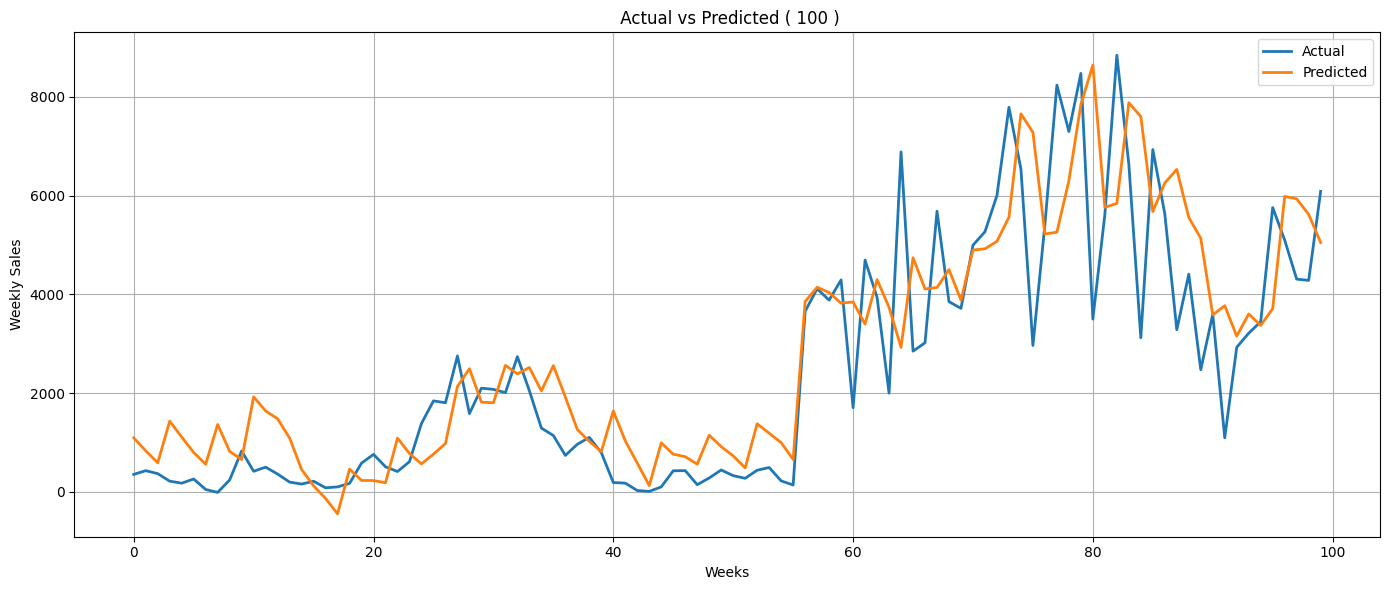

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" MAE: {mae:.2f}")

plt.figure(figsize=(14,6))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linewidth=2)
plt.title(" Actual vs Predicted ( 100 )")
plt.xlabel("Weeks")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


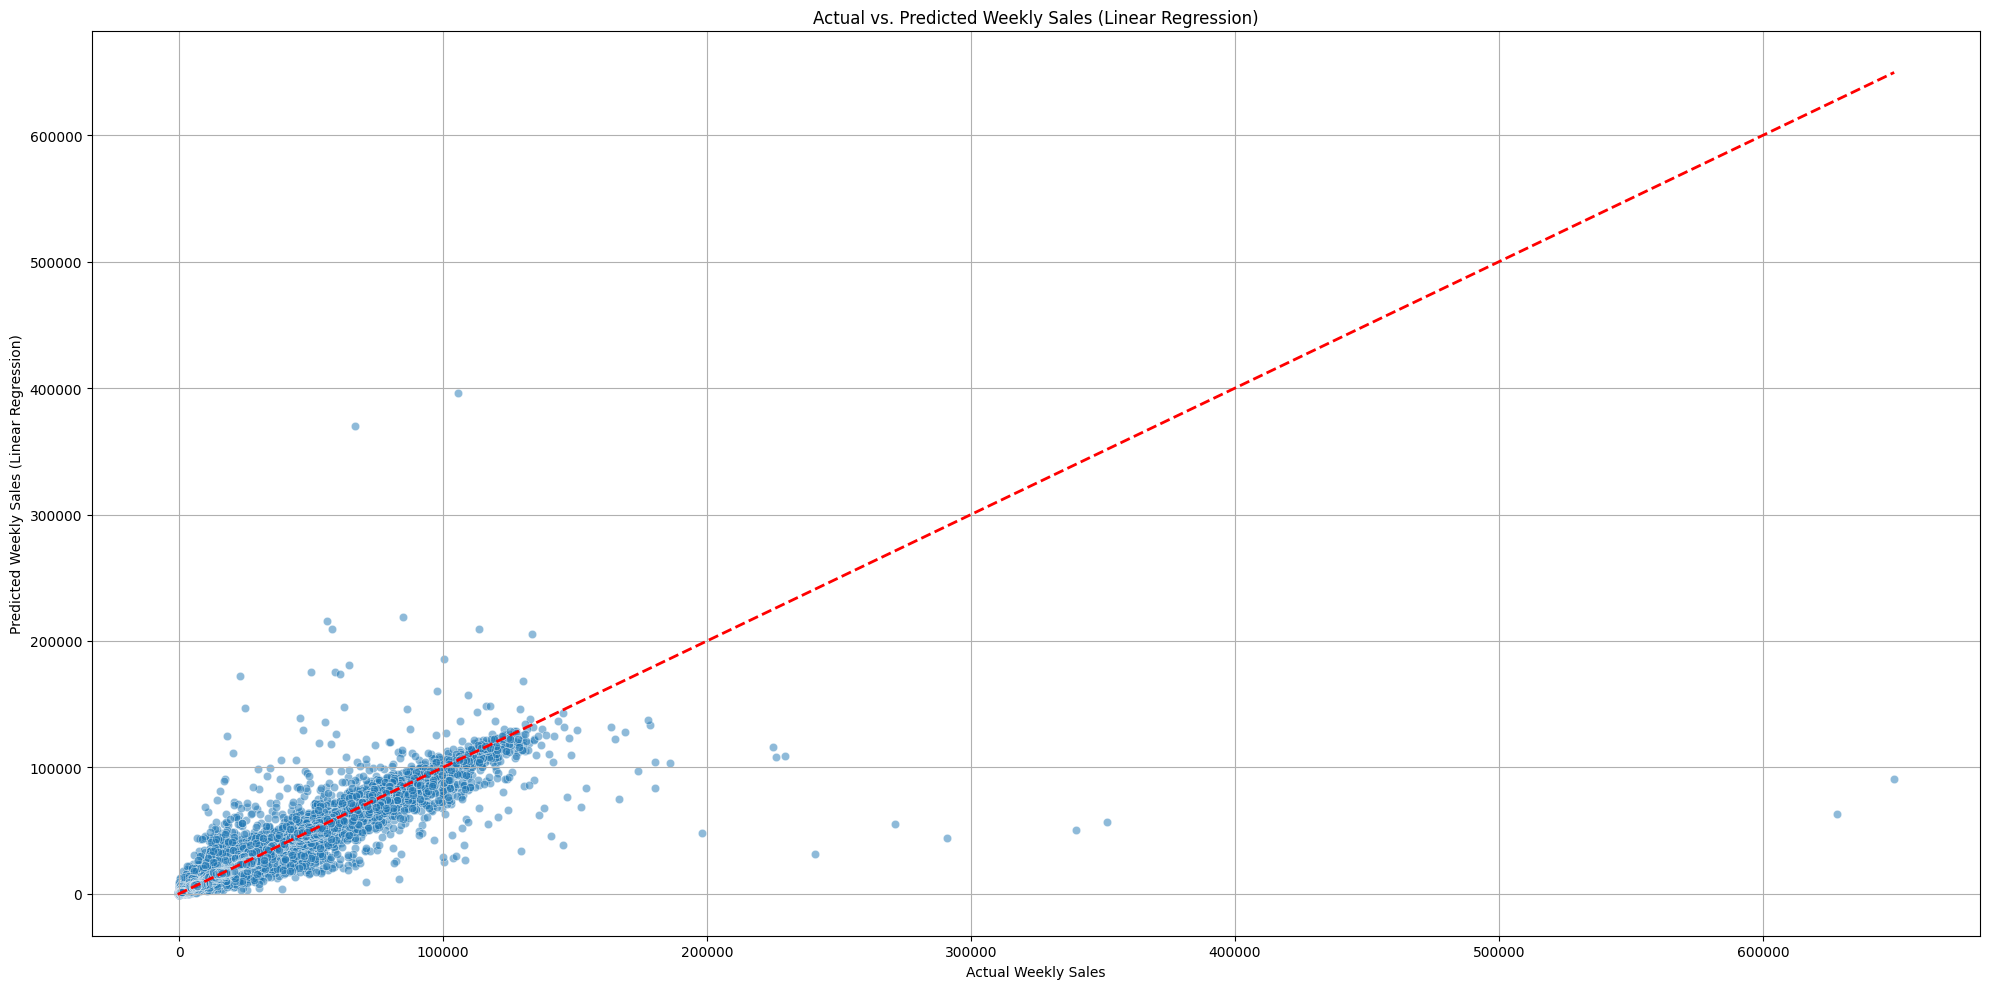

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales (Linear Regression)')
plt.title('Actual vs. Predicted Weekly Sales (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()



# Create Rolling Average Feature  We generate a new column representing the average of the past 3 weeks of sales for each (Store, Dept) using rolling window.


In [40]:
merged_df = merged_df.sort_values(by=['Store', 'Dept', 'Date'])

merged_df['rolling_mean_3'] = (
    merged_df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .transform(lambda x: x.shift(1).rolling(window=3).mean())
)

merged_df[['Store', 'Dept', 'Date', 'Weekly_Sales', 'rolling_mean_3']].head(10)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Store,Dept,Date,Weekly_Sales,rolling_mean_3
0,1,1,2010-02-05,24924.50,NaN
1,1,1,2010-02-12,46039.49,NaN
2,1,1,2010-02-19,41595.55,NaN
3,1,1,2010-02-26,19403.54,37519.846667
4,1,1,2010-03-05,21827.90,35679.526667
5,1,1,2010-03-12,21043.39,27608.996667
6,1,1,2010-03-19,22136.64,20758.276667
7,1,1,2010-03-26,26229.21,21669.310000
8,1,1,2010-04-02,57258.43,23136.413333
9,1,1,2010-04-09,42960.91,35208.093333


/tmp/ipykernel_36/1175582441.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


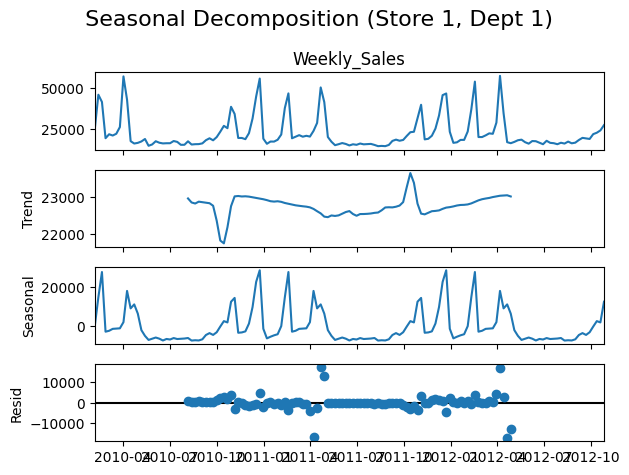

In [41]:
import statsmodels.api as sm
store_dept = merged_df[(merged_df['Store'] == 1) & (merged_df['Dept'] == 1)]
store_dept = store_dept.sort_values('Date').set_index('Date')
decomposition = sm.tsa.seasonal_decompose(store_dept['Weekly_Sales'], model='additive', period=52)
decomposition.plot()
plt.suptitle(" Seasonal Decomposition (Store 1, Dept 1)", fontsize=16)
plt.tight_layout()
plt.show()



**Clean Data Before Training XGBoost  We drop rows with missing values in `lag` and `rolling_mean_3` to ensure the model trains without errors**


In [42]:
xgb_df = merged_df.dropna(subset=['lag_1', 'lag_2', 'lag_3', 'rolling_mean_3'])


In [43]:
features = ['Store', 'Dept', 'month', 'week', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3']
X = xgb_df[features]
y = xgb_df['Weekly_Sales']


In [44]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



**Time-based Split with TimeSeriesSplit  We use `TimeSeriesSplit` to divide the dataset into 5 sequential folds.  We also prepare lists to store evaluation results across folds**


In [45]:
tscv = TimeSeriesSplit(n_splits=5)
rmse_list = []
y_true_all = []
y_pred_all = []



# 6-XGBoost with TimeSeriesSplit (Bonus)  Use XGBoost with time-aware split to enhance forecasting accuracy
# 

In [46]:
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)


In [47]:
print(f"Average RMSE across 5 folds: {np.mean(rmse_list):.2f}")


Average RMSE across 5 folds: 4301.73



**Actual vs Predicted  Visual comparison of actual vs predicted sales using scatter plot**
****

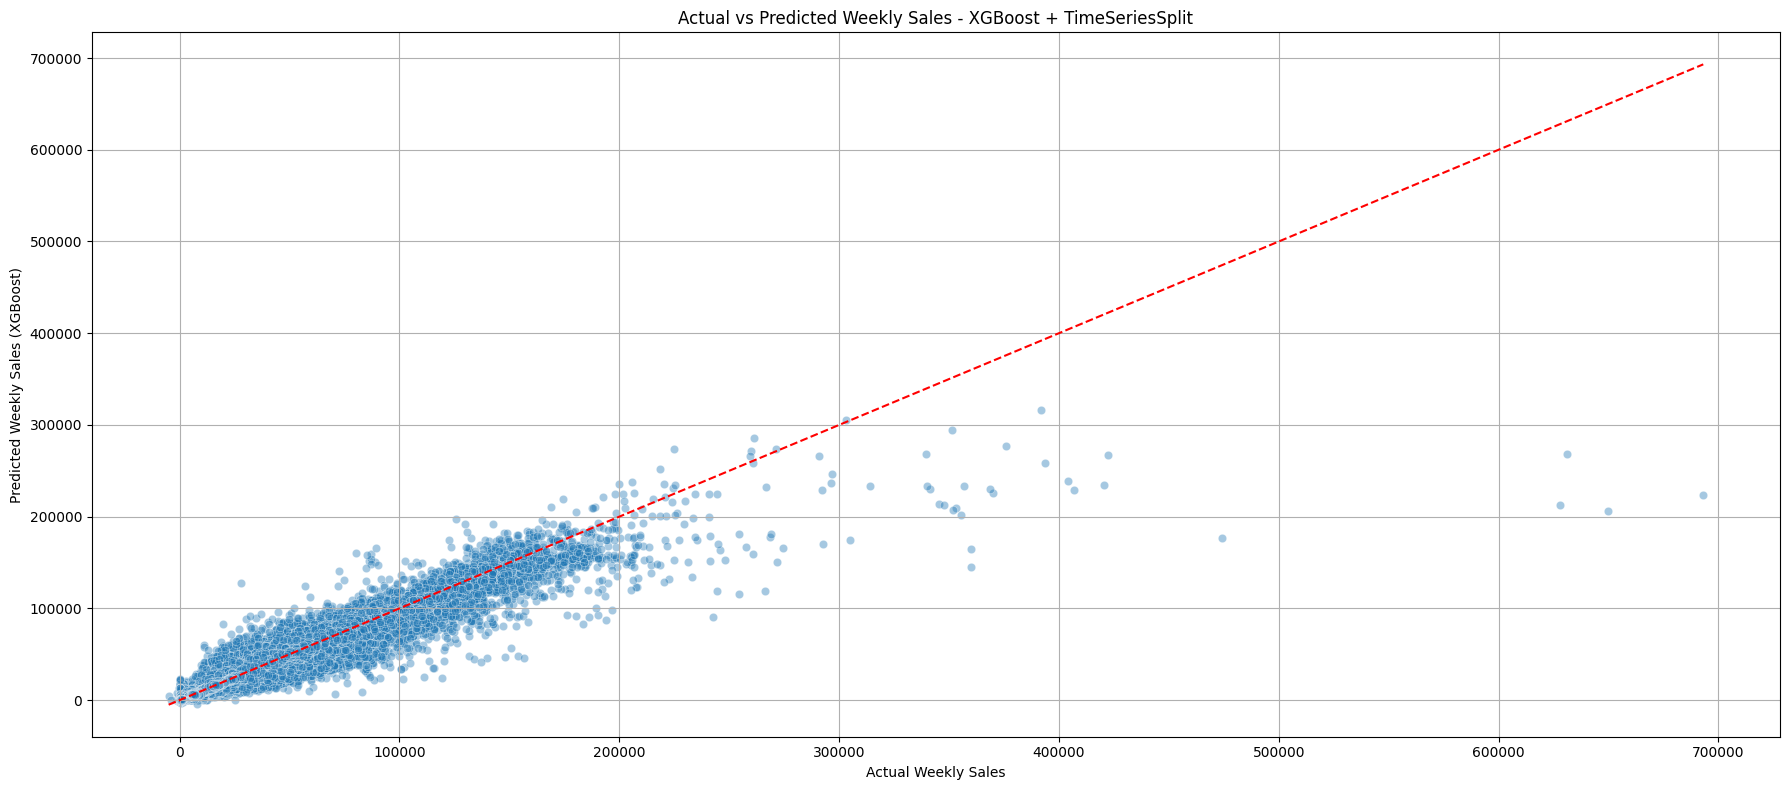

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.scatterplot(x=y_true_all, y=y_pred_all, alpha=0.4)
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], 'r--')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales (XGBoost)')
plt.title('Actual vs Predicted Weekly Sales - XGBoost + TimeSeriesSplit')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
model.save_model("xgb_model.model")
model.save_model("xgb_model.json")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [09:44:28] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
